# Positive-Negative

In [1]:
from google.colab import drive
drive.mount("/content/MyDrive")

Mounted at /content/MyDrive


## Import Dataset

In [ ]:
import pandas as pd

data = pd.read_csv("/content/MyDrive/MyDrive/IMDB_Dataset.csv", engine = "python", error_bad_lines=False)
data.columns = ["Reviews", "Target"]
data.head()

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
Skipping line 47480: unexpected end of data


,Reviews,Target
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
data.Target.value_counts()

negative    23742
positive    23736
Name: Target, dtype: int64

In [ ]:
dictionary = {0:"Bad_Review",
              1:"Good_Review"}

In [ ]:
import random

random_index = random.randint(0,len(data)-5)
for row in data[["Reviews", "Target"]][random_index:random_index+5].itertuples():
  _, text , target = row
  print(f'Target: {target} ')
  print(f'Text:\t{text}\n')
  print("---\n")

Target: positive 
Text:	Why would I say that? Because when the movie ended, I was in a good mood. So many people exclaim at the end, wow! Bruce Willis can be funny. For those of you who believe he learned how to act after the sixth sense, you must be very new to his career. He won an emmy for best actor in a comedy series before he did Die Hard. It's like saying, wow, the sky learned to deposit snow on the ground just because it's your first winter in life. The movie was hilarious. What boggles my mind is how some other comments made about this movie claims that there are no memorable lines or scenes. Spoiler...<br /><br />The waaaambulance? I am not a loser? Have you ever seen a grown up scream I am not a loser before?<br /><br />I thought this movie was great. It was funny, it was never boring and in a cheesy Disney sort of way, it had a point to make. Something to do with life and of course any kid movie trying to do that is in over it's head but for once, I didn't care.<br /><br />

## Clear Sentences

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() 
data["Target"] = le.fit_transform(data["Target"])
data.head()

,Reviews,Target
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [ ]:
import tensorflow as tf
def tf_lower_and_split_punct(text):
  # Split accecented characters.
  # text = text.normalize_utf8_with_offsets_map(text, 'NFKD')
  text = tf.strings.lower(text)
  # Keep space, a to z, and select punctuation.
  text = tf.strings.regex_replace(text, '[^ a-z.?!,¿]', '')
  # Add spaces around punctuation.
  text = tf.strings.regex_replace(text, '[.?!,¿]', r' \0 ')
  # Strip whitespace remove the space from the begining and end.
  text = tf.strings.strip(text)
  return text

In [ ]:
print(tf_lower_and_split_punct(data['Reviews'][0]).numpy().decode())

one of the other reviewers has mentioned that after watching just  oz episode youll be hooked .  they are right ,  as this is exactly what happened with me . br br the first thing that struck me about oz was its brutality and unflinching scenes of violence ,  which set in right from the word go .  trust me ,  this is not a show for the faint hearted or timid .  this show pulls no punches with regards to drugs ,  sex or violence .  its is hardcore ,  in the classic use of the word . br br it is called oz as that is the nickname given to the oswald maximum security state penitentary .  it focuses mainly on emerald city ,  an experimental section of the prison where all the cells have glass fronts and face inwards ,  so privacy is not high on the agenda .  em city is home to many .  . aryans ,  muslims ,  gangstas ,  latinos ,  christians ,  italians ,  irish and more .  .  .  . so scuffles ,  death stares ,  dodgy dealings and shady agreements are never far away . br br i would say the m

In [ ]:
from sklearn.model_selection import train_test_split

train_sentences,val_sentences,train_labels,val_labels = train_test_split(data['Reviews'].to_numpy(),
                                                                         data['Target'].to_numpy(),
                                                                         test_size=0.2,
                                                                         random_state=42)
print(len(train_sentences),len(val_sentences))

37982 9496


In [ ]:
train_sentences[0]

'There is a difference between a "film," and a "movie." A film, regardless of quality, is ready for public consumption. A movie is what a group of friends gets together to make over the course of a weekend with a camcorder. In my time as a viewer, I have seen may examples of both.<br /><br />On September 19, I attended a screening of writer/director Jon Satejowski\'s "Donnybrook." Now having read the script and having seen two different cuts (a rough cut and the "finished" product) of this piece, I can safely say it is a movie. And a student movie, at that. It is, for lack of a better word, competent, which is to say, the director knew how to push record on a camera and capture moving images. The visuals are, for the most part, static and unimpressive, and dialog scenes are reduced to mostly long shots, with little to no close up shots to allow the audience to establish a relationship with the characters. I understand that this is a modestly budgeted film, but some visual flair would h

## Text_Vectorization

In [ ]:
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

text_vectorization = TextVectorization(max_tokens=None,
                                       standardize=tf_lower_and_split_punct,
                                       split='whitespace',
                                       ngrams=None,
                                       output_mode='int',
                                       output_sequence_length=None)

In [ ]:
round(sum([len(i.split()) for i in train_sentences])/len(train_sentences)) 

232

In [ ]:
max_vocab_length = 100000
max_length = 232

text_vectorization = TextVectorization(max_tokens = max_vocab_length,
                                       output_mode='int',
                                       output_sequence_length = 232,
                                       )

In [ ]:
text_vectorization.adapt(train_sentences)

In [ ]:
text_vectorization([train_sentences[0]])

<tf.Tensor: shape=(1, 232), dtype=int64, numpy=
array([[   48,     7,     4,  1457,   199,     4,    20,     3,     4,
           18,     4,    20,  2823,     5,   491,     7,  1523,    17,
         1056, 14028,     4,    18,     7,    49,     4,   519,     5,
          331,   204,   297,     6,    95,   127,     2,   259,     5,
            4,  2456,    16,     4,  5844,     8,    54,    60,    15,
            4,   523,    10,    26,   107,   197,  2767,     5, 16529,
           13,    21,  6093,  6561,    10,  6441,     4,  2808,     5,
         2662,  3082, 91851, 51970,   147,   256,   329,     2,   232,
            3,   256,   107,   110,   272,  1910,     4,  2667,   630,
            3,     2,  1807,  2138,     5,    11,   401,    10,    67,
         6693,   131,     9,     7,     4,    18,     3,     4,  1486,
           18,    31,    12,     9,     7,    17,   557,     5,     4,
          125,   677,  3168,    62,     7,     6,   131,     2,   172,
          676,    86,     6, 

In [ ]:
word_in_vocab = text_vectorization.get_vocabulary()
print(len(word_in_vocab))

100000


## Tokenizer

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words = 100000)
tokenizer.fit_on_texts(train_sentences)

train_seq = tokenizer.texts_to_sequences(train_sentences)
train_padded = pad_sequences(train_seq)

test_seq = tokenizer.texts_to_sequences(val_sentences)
test_padded = pad_sequences(test_seq)

In [ ]:
train_padded[0]

array([   0,    0,    0, ..., 1683,    5,  103], dtype=int32)

# Embeddings

In [ ]:
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim = max_vocab_length,
                             output_dim = 512,
                             input_length = max_length)
embedding

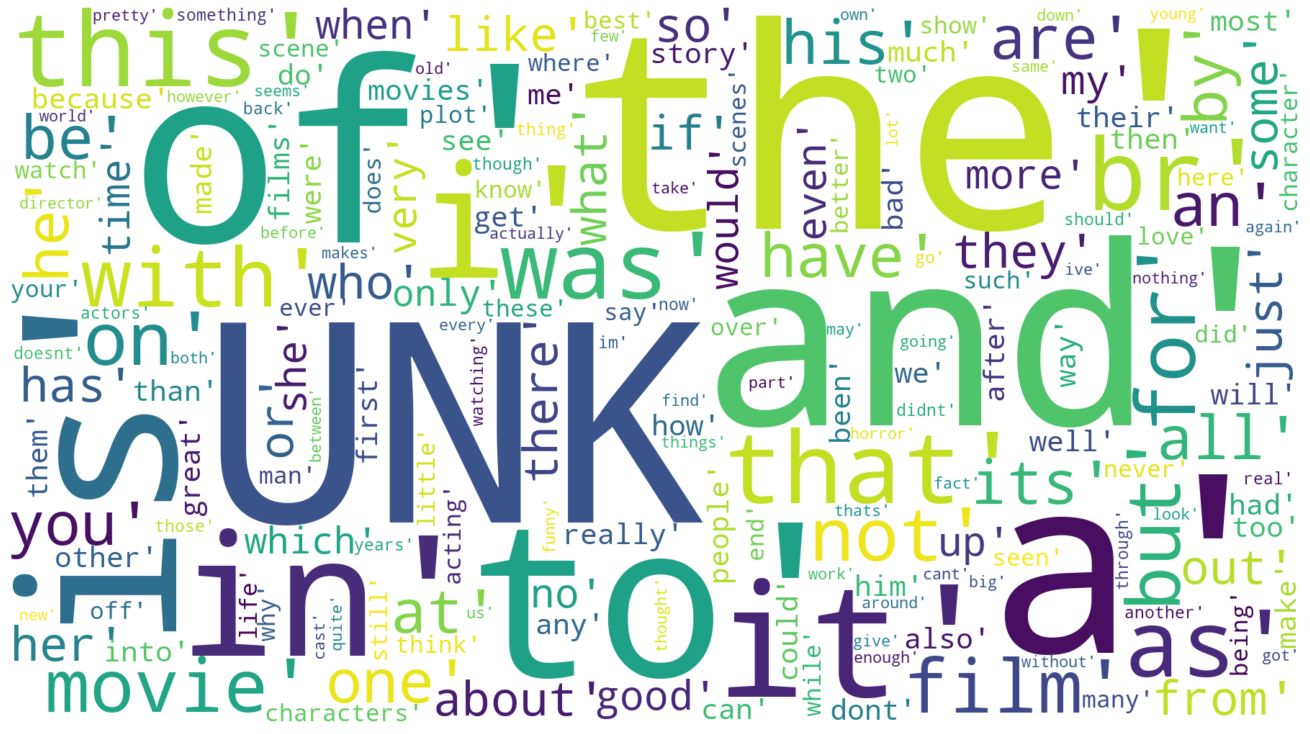

In [ ]:
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt

word_cloud = WordCloud(width=1800, height=1000, background_color='white').generate(str(word_in_vocab[:2000]))
fig = plt.figure(figsize = (30,10),facecolor = 'white')
plt.imshow(word_cloud, interpolation="bilinear")
plt.axis('off')
# plt.title('Top 2000 Most Common Words', fontsize=80)
plt.tight_layout(pad=0)
plt.show()

# Bi-directional LSTM

In [ ]:
model = tf.keras.models.Sequential([tf.keras.layers.Embedding(100000, 512),
                                    # tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences = True)),
                                    # tf.keras.layers.Dropout(0.3),
                                    # tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128,  return_sequences = True)),
                                    # tf.keras.layers.Dropout(0.3),
                                    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
                                    # tf.keras.layers.Dropout(0.3),
                                    tf.keras.layers.Dense(32, activation='relu'),
                                    tf.keras.layers.Dropout(0.3),
                                    tf.keras.layers.Dense(1, activation='sigmoid')])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 512)         51200000  
                                                                 
 bidirectional (Bidirectiona  (None, 64)               139520    
 l)                                                              
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 51,341,633
Trainable params: 51,341,633
Non-trainable params: 0
__________________________________________

In [ ]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'],run_eagerly=True)

In [ ]:
history = model.fit(train_padded,
                    train_labels,
                    epochs=1,
                    validation_data = (test_padded,val_labels),
                    )

1187/1187 [==============================] - 322s 269ms/step - loss: 0.3784 - accuracy: 0.8371 - val_loss: 0.2651 - val_accuracy: 0.9001


In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix
def evaluation_function(y_preds,y_true):
  accuracy = accuracy_score(y_true,y_preds)*100
  precision = precision_score(y_true,y_preds,average = 'binary')*100
  recall = recall_score(y_true,y_preds,average = 'binary')*100
  f1 = f1_score(y_true,y_preds,average = 'binary')*100
  confusion_metrics=confusion_matrix(y_true,y_preds)*100

  d={"Accuracy":accuracy,
     "Precision":precision,
     "Recall":recall,
     "F1-Score":f1}
    #  "Confusion_Metrics: ":confusion_metrics}

  return d

In [ ]:
prob = model.predict(test_padded)
pred = tf.round(prob)
print(prob[:10],pred[:10])

297/297 [==============================] - 22s 74ms/step
[[0.60181296]
 [0.02745738]
 [0.97798276]
 [0.06096615]
 [0.17474769]
 [0.8755965 ]
 [0.91630507]
 [0.69846463]
 [0.64556247]
 [0.32628313]] tf.Tensor(
[[1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]], shape=(10, 1), dtype=float32)


In [ ]:
model_results = evaluation_function(val_labels,pred)
model_results

{'Accuracy': 90.00631844987363,
 'Precision': 89.1558712912662,
 'Recall': 90.84522035341708,
 'F1-Score': 89.99261836971424}

In [ ]:
dictionary = {0:"Bad_Review",
              1:"Good_Review"}

In [ ]:
def predict_sentiment(text):
    tw = tf_lower_and_split_punct(text)
    # seq = tokenizer.texts_to_sequences([tw])
    # pad = pad_sequences(seq)
    pad = text_vectorization([tw])
    prob = model.predict(pad)
    print(prob)
    prediction = int(tf.round(prob))
    print("Predicted label: ", dictionary[prediction])
    return prediction
# test_sentence1 = "it was a good Movie"
# predict_sentiment(test_sentence1)

In [ ]:
arr = ["Spent an evening at a special screening of #SalaamVenky on invitation of the film's screenwriter, Sammeer Arora. A brilliantly written movie that raises an important question, this one is an immersive experience to be watched in the theaters.", 
 "Watched #AnActionHero It's the best comedy and action movie among all I watched recently. @ayushmannk is superb as usual in his role. The story starts, progresses, and ends well without disappointing you. A really good entertaining watch."]

a = []
for i in range(len(arr)):
  p = predict_sentiment(arr[i])
  a.append(p)

1/1 [==============================] - 0s 29ms/step
[[0.46458623]]
Predicted label:  Bad_Review
1/1 [==============================] - 0s 29ms/step
[[0.47633585]]
Predicted label:  Bad_Review


<BarContainer object of 2 artists>

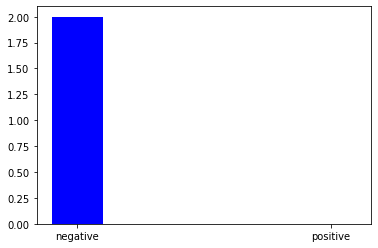

In [ ]:
import matplotlib.pyplot as plt
z = a.count(0)
z2 = a.count(1)
b = [z, z2]
plt.bar(["negative", "positive"], b, color = "blue", width = 0.2)